#Pengambilan Datasets

In [ ]:
!pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kenedifp","key":"fbab24e0c74ec508b2afdd741b5c3afd"}'}

kode tersebut digunakan untuk menginstal Kaggle dan memungkinkan pengguna mengunggah file ke notebook Colab.

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

membuat direktori kaggle dan memindahkan file kaggle.json ke dalam direktori kaggle lalu memberikan izin pada file kaggle.json sehingga hanya pemiliknya yang dapat membacanya dan mengubahnya, sementara yang lain tidak memiliki izin untuk itu. Ini dilakukan untuk menjaga keamanan kredensial Kaggle Anda.

In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 85% 74.0M/86.8M [00:00<00:00, 169MB/s]
100% 86.8M/86.8M [00:00<00:00, 158MB/s]


medownload dataset dari kaggle dengan nama brain-tumor-classification-mri

In [ ]:
import zipfile,os,shutil

In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

In [ ]:
# dataset = '/content/brain-tumor-classification-mri.zip'
# with ZipFile(dataset, 'r') as zip:
#   zip.extractall()
#   print('The dataset is extracted')

In [ ]:
#ekstrak file zip ke dalam folder datasets
fileZip = "/content/brain-tumor-classification-mri.zip"
extracZip = zipfile.ZipFile(fileZip, 'r')
extracZip.extractall("datasets")

In [ ]:
#mengecek file apa saja yang ada di folder datasets
os.listdir("/content/datasets")

['Training', 'Testing']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display, clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/content/datasets'):
    for filenames in filenames:
      print(os.path.join(dirname, filenames))

/content/datasets/Training/no_tumor/image(4).jpg
/content/datasets/Training/no_tumor/image(270).jpg
/content/datasets/Training/no_tumor/image(180).jpg
/content/datasets/Training/no_tumor/image(223).jpg
/content/datasets/Training/no_tumor/image(266).jpg
/content/datasets/Training/no_tumor/image(295).jpg
/content/datasets/Training/no_tumor/image(44).jpg
/content/datasets/Training/no_tumor/image(191).jpg
/content/datasets/Training/no_tumor/image(90).jpg
/content/datasets/Training/no_tumor/image(185).jpg
/content/datasets/Training/no_tumor/image(46).jpg
/content/datasets/Training/no_tumor/image(215).jpg
/content/datasets/Training/no_tumor/image(34).jpg
/content/datasets/Training/no_tumor/image (27).jpg
/content/datasets/Training/no_tumor/image(205).jpg
/content/datasets/Training/no_tumor/image(316).jpg
/content/datasets/Training/no_tumor/image (32).jpg
/content/datasets/Training/no_tumor/image(171).jpg
/content/datasets/Training/no_tumor/image(121).jpg
/content/datasets/Training/no_tumor/i

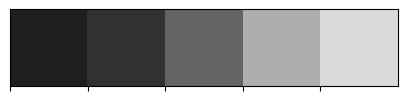

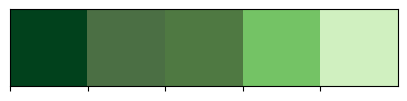

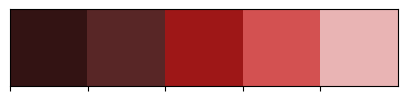

In [ ]:

colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']  # Memperbaiki penulisan warna
colors_green = ['#01411C', '#4B6F44', '#4F7942', '#74C365', '#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)


In [ ]:
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']

In [ ]:
labels[0]

'glioma_tumor'

In [ ]:
x_train = []
y_train = []
image_size = 150 #mengubah ukuran gambar menjadi persegi dengan sisi sepanjang 150 pixels

# Load data from the Training directory
for i in labels:
    folderPath = os.path.join('../content/datasets', 'Training', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        x_train.append(img)
        y_train.append(i)

# Load data from the Testing directory
for i in labels:
    folderPath = os.path.join('../content/datasets', 'Testing', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        x_train.append(img)
        y_train.append(i)

x_train = np.array(x_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 149.25it/s]


mengubah ukuran gambar 5x12 menjadi 150x150 mempermudah untuk proses training

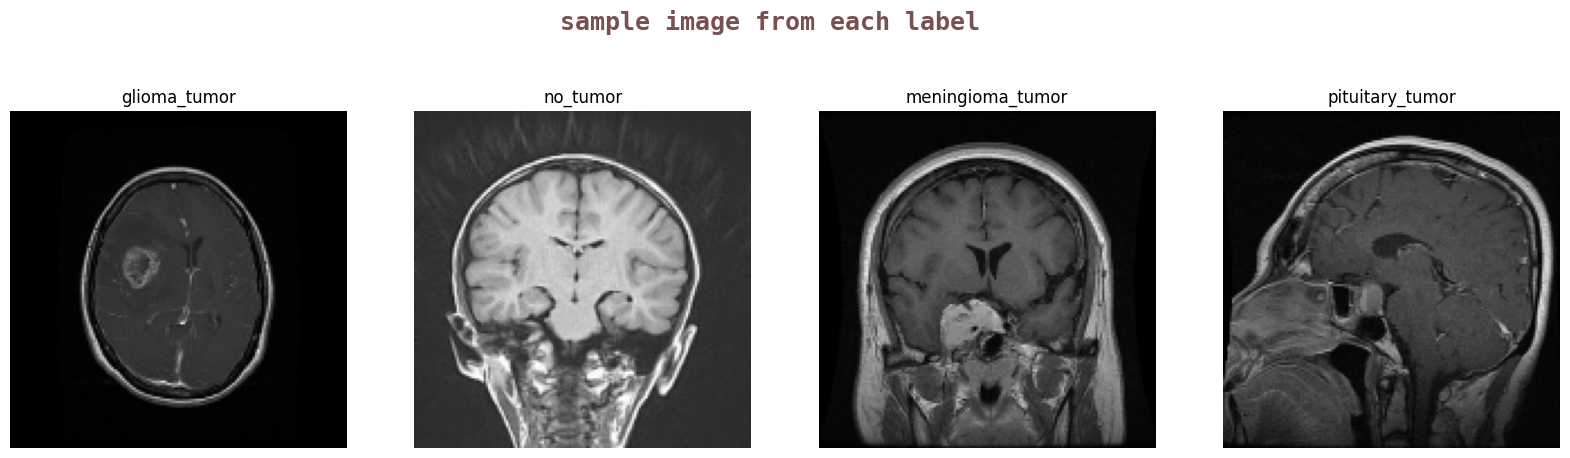

In [ ]:
import matplotlib.pyplot as plt

k = 0
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
fig.text(s='sample image from each label', size=18, fontweight='bold',
         fontname='monospace', color=colors_red[1], y=0.62, x=0.4, alpha=0.8)

for i in labels:
    j = 0
    while True:
        if y_train[j] == i:
            ax[k].imshow(x_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k += 1
            break
        j += 1

plt.show()


In [ ]:
x_train, y_train = shuffle(x_train, y_train, random_state=101)

In [ ]:
x_train.shape

(3264, 150, 150, 3)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(x_train)
x_train.shape


(3264, 150, 150, 3)

ImageDataGenerator berfungsi mencegah terjadinya overfitting sehingga gambar yang ada dapat bervariasi dalam bentuk padding, dan zooming sehingga memiliki banya variasi dan mencegah terjadinya overfitting pada saat training

### spliting data 20% dari total dataset sehingga data train 90% dari total dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=101)

melakukan spliting data 20% dari total dataset sehingga data train 90% dari total dataset

In [ ]:
y_train_new = []
for i in y_train:
  y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
  y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
effnet = EfficientNetB0(weights='imagenet', include_top=False,input_shape=(image_size,image_size,3))

16705208/16705208 [==============================] - 0s 0us/step


mempersingkat waktu proses pengklasifikasi menggunakan EfficientNetB0, weights berasal dari proses kita sendiri

In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 150, 150, 3)          0         ['normalization[0][0]']   

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics =['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau

tensorboard = TensorBoard(log_dir='logs')
checkpoint = ModelCheckpoint("effnet.h5", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, min_delta=0.001,
                              mode='auto', verbose=1)


## Training Data

In [ ]:
history = model.fit(x_train,y_train,validation_split=0.2, epochs=12, verbose=1, batch_size=64,
                    callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
33/33 [==============================] - ETA: 0s - loss: 0.5234 - accuracy: 0.8036
Epoch 1: val_accuracy improved from -inf to 0.61377, saving model to effnet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 320s 9s/step - loss: 0.5234 - accuracy: 0.8036 - val_loss: 1.7363 - val_accuracy: 0.6138 - lr: 0.0010
Epoch 2/12
33/33 [==============================] - ETA: 0s - loss: 0.1798 - accuracy: 0.9420
Epoch 2: val_accuracy improved from 0.61377 to 0.72849, saving model to effnet.h5
33/33 [==============================] - 280s 8s/step - loss: 0.1798 - accuracy: 0.9420 - val_loss: 1.3167 - val_accuracy: 0.7285 - lr: 0.0010
Epoch 3/12
33/33 [==============================] - ETA: 0s - loss: 0.0820 - accuracy: 0.9717
Epoch 3: val_accuracy improved from 0.72849 to 0.84512, saving model to effnet.h5
33/33 [==============================] - 289s 9s/step - loss: 0.0820 - accuracy: 0.9717 - val_loss: 0.6915 - val_accuracy: 0.8451 - lr: 0.0010
Epoch 4/12
33/33 [==============================] - ETA: 0s - loss: 0.0730 - accuracy: 0.9775
Epoch 4: val_accuracy improved from 0.84512 to 0.90440, saving model to effnet.h5
33/33 [==============================] - 28

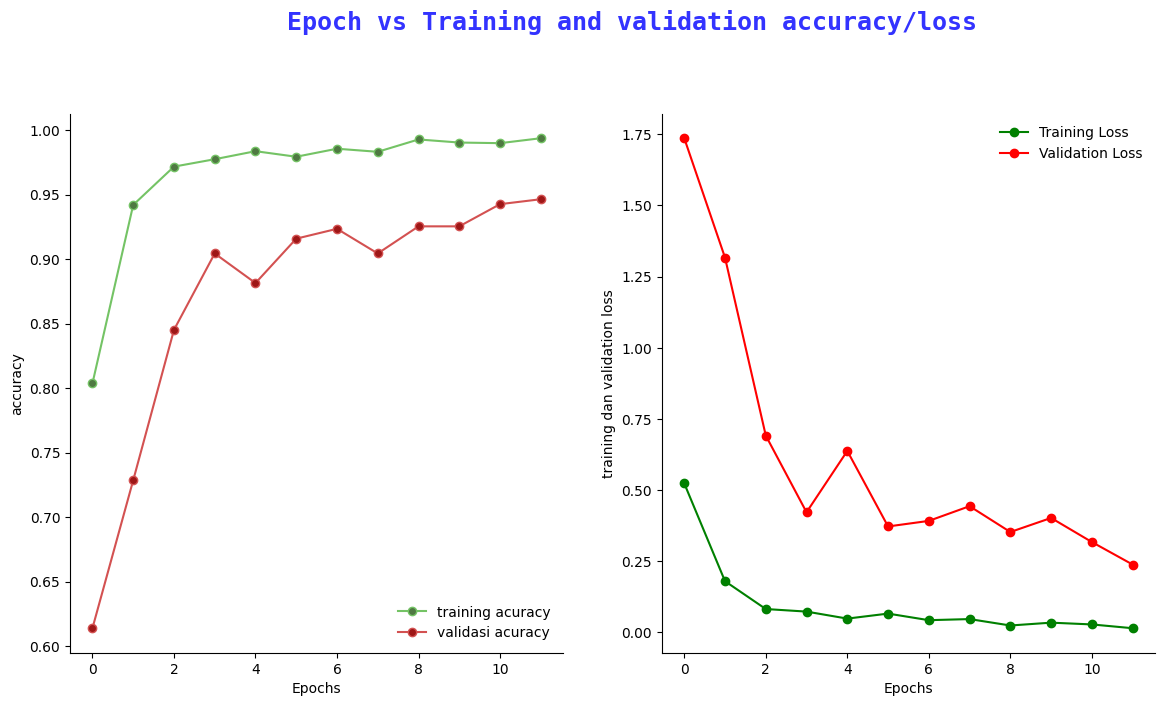

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss= history.history['val_loss']

fig.text(s='Epoch vs Training and validation accuracy/loss', size=18, fontweight='bold',
         fontname='monospace', color='blue', y=1, x=0.28, alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[2],color=colors_green[3],
           label='training acuracy')
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[2],color=colors_red[3],
           label='validasi acuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('accuracy')

sns.despine()

ax[1].plot(epochs, train_loss, marker='o', markerfacecolor='green', color='green',
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor='red', color='red',
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('training dan validation loss')

fig.show()

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
y_test_new = np.argmax(y_test, axis=1)

21/21 [==============================] - 19s 837ms/step


In [ ]:
print(classification_report(y_test_new, pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       168
           1       0.93      0.99      0.96       108
           2       0.95      0.91      0.93       201
           3       0.95      0.98      0.96       176

    accuracy                           0.95       653
   macro avg       0.95      0.96      0.95       653
weighted avg       0.95      0.95      0.95       653



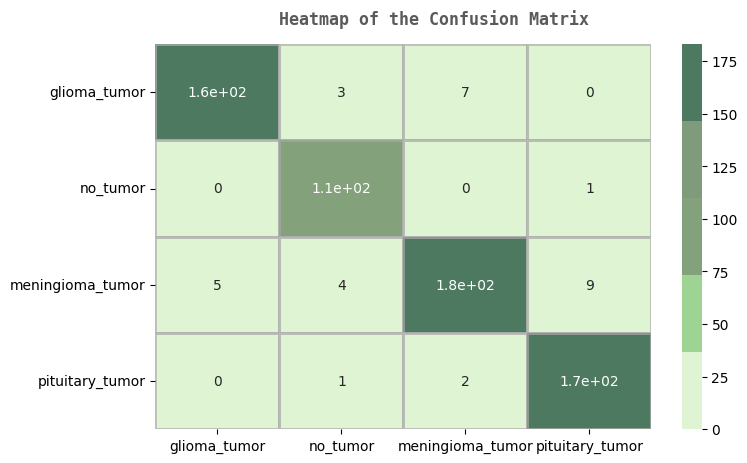

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))  # Fixed the figsize syntax

sns.heatmap(confusion_matrix(y_test_new, pred), ax=ax, xticklabels=labels, yticklabels=labels, annot=True,
            cmap=colors_green[::-1], alpha=0.7, linewidths=2, linecolor=colors_dark[3])  # Fixed linewidth syntax

fig.text(s='Heatmap of the Confusion Matrix', size=12, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=0.92, x=0.28, alpha=0.8)

plt.show()


## spliting data 90:10

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=101)

# training data

In [ ]:
history = model.fit(x_train,y_train,validation_split=0.1, epochs=12, verbose=1, batch_size=64,
                    callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
34/34 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 0.9972
Epoch 1: val_accuracy did not improve from 0.98723
34/34 [==============================] - 290s 8s/step - loss: 0.0106 - accuracy: 0.9972 - val_loss: 0.0441 - val_accuracy: 0.9872 - lr: 9.0000e-05
Epoch 2/12
34/34 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.9981
Epoch 2: val_accuracy did not improve from 0.98723
34/34 [==============================] - 270s 8s/step - loss: 0.0096 - accuracy: 0.9981 - val_loss: 0.0515 - val_accuracy: 0.9830 - lr: 9.0000e-05
Epoch 3/12
34/34 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9976
Epoch 3: val_accuracy did not improve from 0.98723

Epoch 3: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
34/34 [==============================] - 272s 8s/step - loss: 0.0109 - accuracy: 0.9976 - val_loss: 0.0479 - val_accuracy: 0.9830 - lr: 9.0000e-05
Epoch 4/12
34/34 [=============================

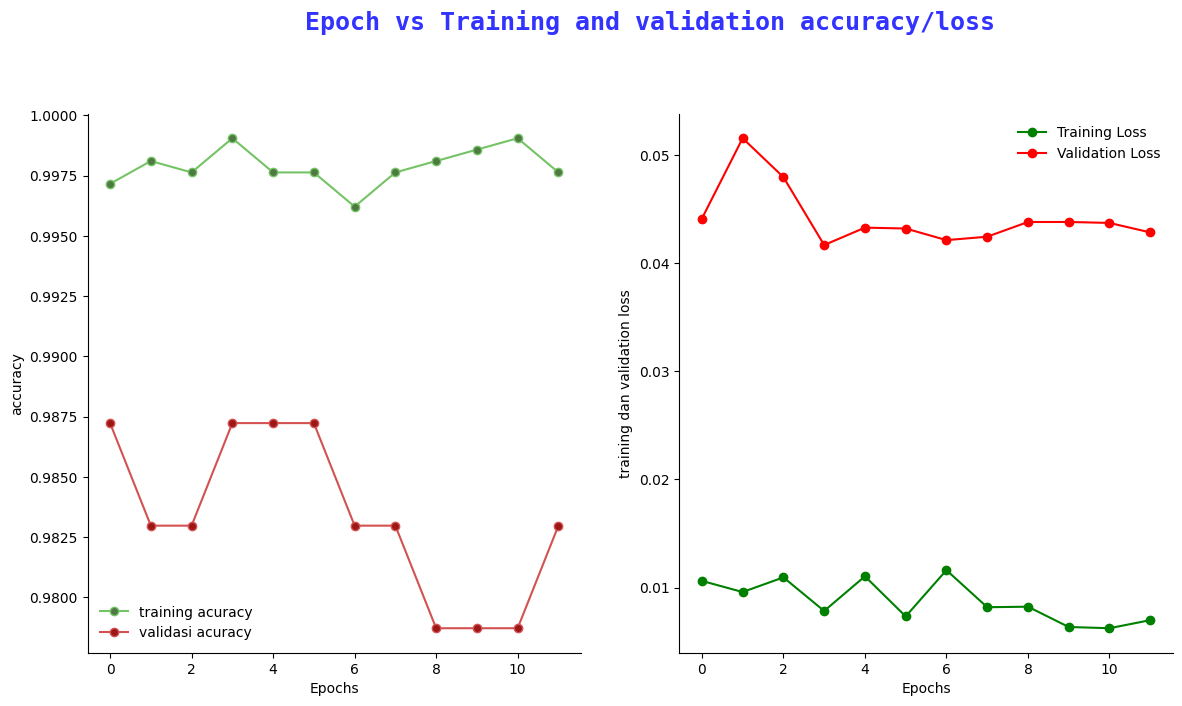

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss= history.history['val_loss']

fig.text(s='Epoch vs Training and validation accuracy/loss', size=18, fontweight='bold',
         fontname='monospace', color='blue', y=1, x=0.28, alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[2],color=colors_green[3],
           label='training acuracy')
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[2],color=colors_red[3],
           label='validasi acuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('accuracy')

sns.despine()

ax[1].plot(epochs, train_loss, marker='o', markerfacecolor='green', color='green',
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor='red', color='red',
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('training dan validation loss')

fig.show()

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
y_test_new = np.argmax(y_test, axis=1)

9/9 [==============================] - 7s 751ms/step


In [ ]:
print(classification_report(y_test_new, pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        80
           1       1.00      0.98      0.99        48
           2       0.96      0.99      0.97        75
           3       0.98      1.00      0.99        59

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262



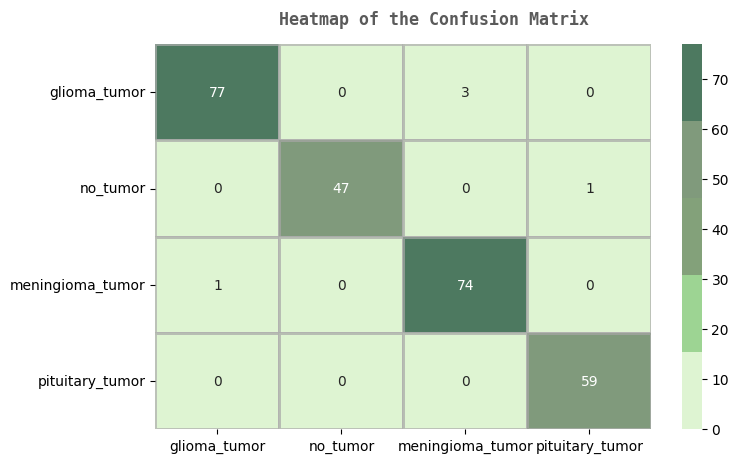

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))  # Fixed the figsize syntax

sns.heatmap(confusion_matrix(y_test_new, pred), ax=ax, xticklabels=labels, yticklabels=labels, annot=True,
            cmap=colors_green[::-1], alpha=0.7, linewidths=2, linecolor=colors_dark[3])  # Fixed linewidth syntax

fig.text(s='Heatmap of the Confusion Matrix', size=12, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=0.92, x=0.28, alpha=0.8)

plt.show()


In [ ]:
def img_pred(upload):
  for name, file_info in uploader.value.items():
    img = Image.open(io.BytesIO(file_info['content']))
  opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
  img = cv2.resize(opencvImage,(150,150))
  img = img.reshape(1,150,150,3)
  p = model.predict(img)
  p = np.argmax(p,axis=1)[0]

  if p==0:
    p='Glioma Tumor'
  elif p==1:
    print('model prediksi nya tidak ada tumor')
  elif p==2:
    p='Meningoma Tumor'
  else:
    p='Pituitary Tumor'

  if p!=1:
    print(f'the model predicts that it is a {p}')

In [ ]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
  with out:
    clear_output()
    try:
      img_pred(uploader)

    except:
      print('no image uploaded')

In [ ]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
button.on_click(on_button_clicked)
widgets.VBox([button,out])